___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# RNN Exercise

**TASK: IMPORT THE BASIC LIBRARIES YOU THINK YOU WILL USE**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
style.use('ggplot')
plt.rcParams['figure.figsize'] = (11, 6)
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

## Data

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

# Project Tasks

**TASK: Read in the data set "Frozen_Dessert_Production.csv" from the Data folder. Figure out how to set the date to a datetime index columns**

In [2]:
# CODE HERE
df = pd.read_csv('DATA/Frozen_Dessert_Production.csv', parse_dates=True,index_col='DATE')

In [3]:
df.head()

,IPN31152N
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


**Task: Change the column name to Production**

In [4]:
#CODE HERE
df.columns = ['Production']

In [5]:
df.head()

,Production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


**TASK: Plot out the time series**

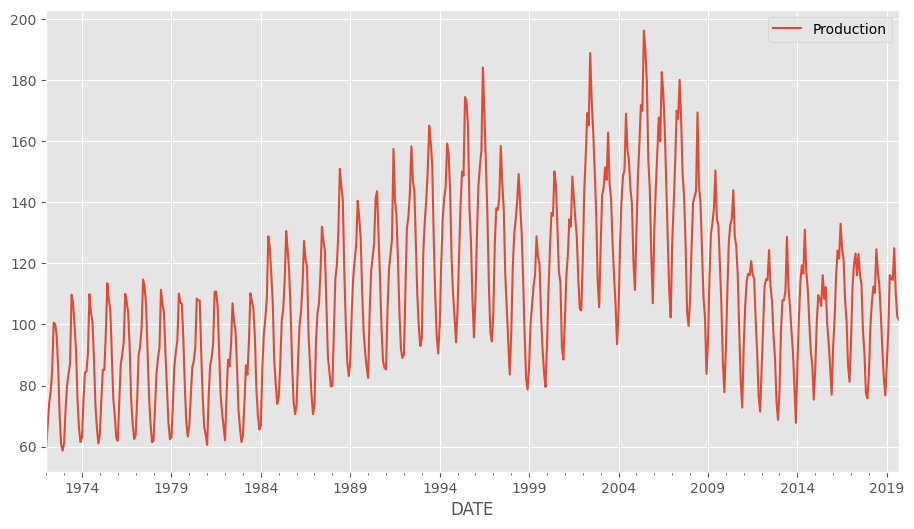

In [6]:
#CODE HERE
df.plot();

## Train Test Split

**TASK: Figure out the length of the data set**

In [7]:
#CODE HERE
len(df)

573

**TASK: Split the data into a train/test split where the test set is the last 24 months of data.**

In [8]:
#CODE HERE
test_size = 18
test_ind = len(df) - test_size

In [9]:
train = df.iloc[:test_ind]
len(train)

555

In [10]:
test = df.iloc[test_ind:]
len(test)

18

## Scale Data

**TASK: Use a MinMaxScaler to scale the train and test sets into scaled versions.**

In [11]:
# CODE HERE
scaler = MinMaxScaler()

In [12]:
scaled_train = scaler.fit_transform(train)

In [13]:
scaled_test = scaler.transform(test)

# Time Series Generator

**TASK: Create a TimeSeriesGenerator object based off the scaled_train data. The batch length is up to you, but at a minimum it should be at least 18 to capture a full year seasonality.**

In [14]:
#CODE HERE
length = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train,
                               length=length,batch_size=1)

In [15]:
generator[0]

(array([[[0.00947104],
         [0.06108982],
         [0.11326273],
         [0.14145625],
         [0.18982663],
         [0.30495972],
         [0.30154406],
         [0.27416065],
         [0.19736841],
         [0.08532665],
         [0.01561588],
         [0.        ]]]),
 array([[0.01774221]]))

### Create the Model

**TASK: Create a Keras Sequential Model with as many LSTM units you want and a final Dense Layer.**

In [27]:
model = Sequential()
model.add(LSTM(50, activation='relu',input_shape=(length, n_features)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50)                10400     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


**TASK: Create a generator for the scaled test/validation set. NOTE: Double check that your batch length makes sense for the size of the test set as mentioned in the RNN Time Series video.**

In [29]:
# CODE HERE
validation_generator = TimeseriesGenerator(scaled_test, scaled_test,
                                          length=length, batch_size=1)

**TASK: Create an EarlyStopping callback based on val_loss.**

In [30]:
early_stop = EarlyStopping(monitor='val_loss', patience=25)

**TASK: Fit the model to the generator, let the EarlyStopping dictate the amount of epochs, so feel free to set the parameter high.**

In [31]:
# CODE HERE
model.fit_generator(generator,epochs=20, 
                    validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/20
543/543 [==============================] - 3s 3ms/step - loss: 0.0374 - val_loss: 0.0351
Epoch 2/20
543/543 [==============================] - 2s 3ms/step - loss: 0.0158 - val_loss: 0.0024
Epoch 3/20
543/543 [==============================] - 2s 3ms/step - loss: 0.0054 - val_loss: 0.0014
Epoch 4/20
543/543 [==============================] - 2s 3ms/step - loss: 0.0043 - val_loss: 0.0027
Epoch 5/20
543/543 [==============================] - 2s 3ms/step - loss: 0.0042 - val_loss: 0.0016
Epoch 6/20
543/543 [==============================] - 2s 3ms/step - loss: 0.0037 - val_loss: 0.0025
Epoch 7/20
543/543 [==============================] - 2s 3ms/step - loss: 0.0036 - val_loss: 0.0017
Epoch 8/20
543/543 [==============================] - 2s 3ms/step - loss: 0.0034 - val_loss: 0.0027
Epoch 9/20
543/543 [==============================] - 2s 3ms/step - loss: 0.0034 - val_loss: 0.0031
Epoch 10/20
543/543 [==============================] - 2s 3ms/step - loss: 0.0031 - val_loss: 0.0024

**TASK: Plot the history of the loss that occured during training.**

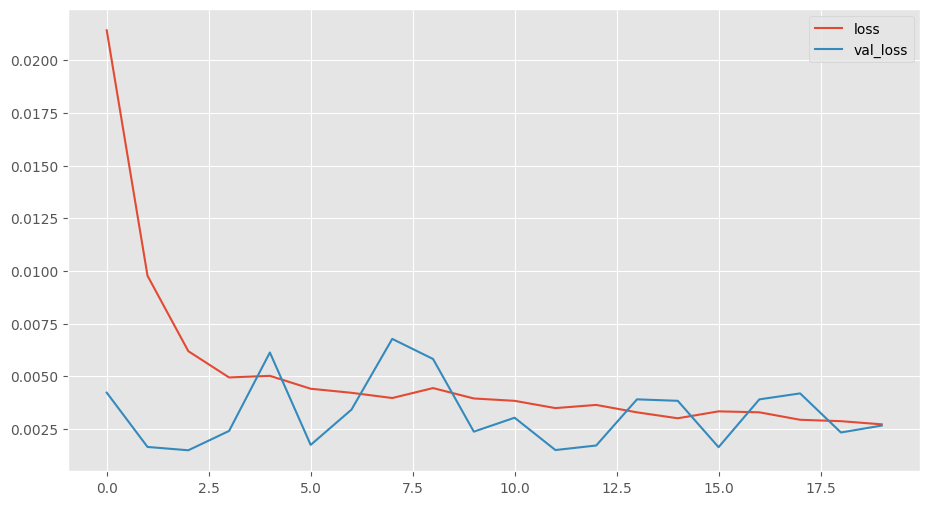

In [21]:
# CODE HERE
losses = pd.DataFrame(model.history.history)
losses.plot();

## Evaluate on Test Data

**TASK: Forecast predictions for your test data range (the last 12 months of the entire dataset). Remember to inverse your scaling transformations. Your final result should be a DataFrame with two columns, the true test values and the predictions.**

In [22]:
# CODE HERE
test_prections = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_prections.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)

1/1 [==============================] - 0s 24ms/step


In [23]:
#transform the scaled test_predictions
true_predictions = scaler.inverse_transform(test_prections)

In [24]:
test['predictions'] = true_predictions
test

,Production,predictions
DATE,,
2018-04-01,112.4309,119.245135
2018-05-01,110.3544,124.964482
2018-06-01,124.5841,127.577573
2018-07-01,117.2215,123.462360
2018-08-01,112.6779,113.874674
2018-09-01,103.3118,99.894124
2018-10-01,92.1321,86.160013
2018-11-01,82.4347,75.300993
2018-12-01,76.7608,71.855721


**TASK: Plot your predictions versus the True test values. (Your plot may look different than ours).**

<Axes: xlabel='DATE'>

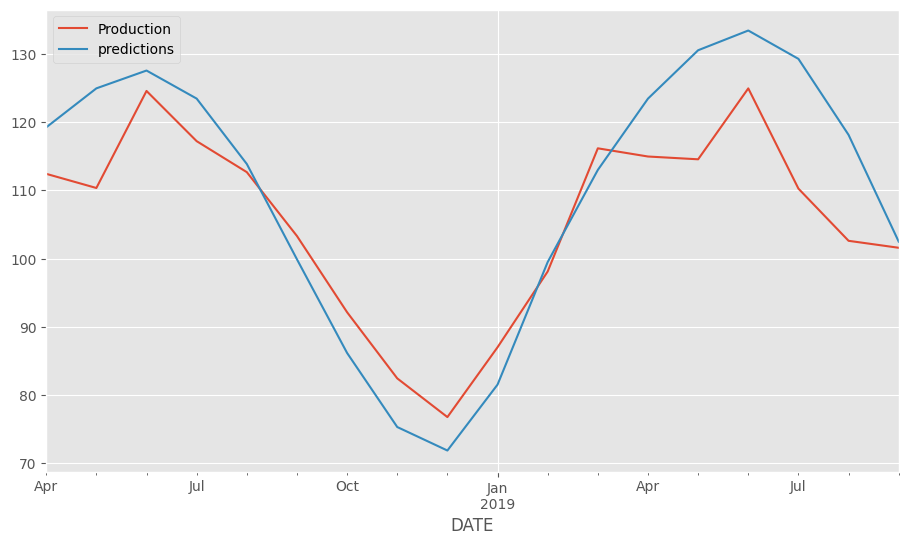

In [25]:
# CODE HERE
test.plot()

**TASK: Calculate your RMSE.**

In [26]:
#CODE HERE
print(mean_squared_error(test['Production'], test['predictions'], squared=False))

9.059715731162788
